In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [0]:
# Create a linearly seprable dataset

n_pts = 100
centres = [[-0.5,0.5], [0.5,0.5]]
X,y = datasets.make_blobs(n_samples=n_pts, random_state=1, centers=centres, cluster_std=0.4)

x_data = torch.FloatTensor(X)
y_data = torch.torch.FloatTensor(y.reshape(100,1))


In [0]:
def scatterplot():
  plt.scatter(X[y==0, 0],X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

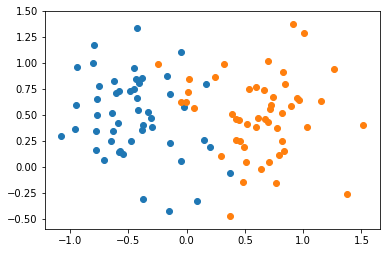

In [4]:
scatterplot()

In [0]:
# Create a model

class Model(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = torch.nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  
  def predict(self, x):
    pred = self.forward(x)
    
    if pred>=0.5:
      return 1
    else:
      return 0
    

In [6]:
torch.manual_seed(1)

In [7]:
model = Model(2,1)
print(model)

Model(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [0]:
err_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
epochs = 10000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  
  loss = err_fn(y_pred, y_data)
  print("Epoch: {}, Error : {}".format(i, loss))
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Error : 0.3492582440376282
Epoch: 1, Error : 0.3491450548171997
Epoch: 2, Error : 0.34903189539909363
Epoch: 3, Error : 0.3489187955856323
Epoch: 4, Error : 0.34880581498146057
Epoch: 5, Error : 0.3486931324005127
Epoch: 6, Error : 0.3485802710056305
Epoch: 7, Error : 0.3484678268432617
Epoch: 8, Error : 0.3483554720878601
Epoch: 9, Error : 0.3482431173324585
Epoch: 10, Error : 0.34813109040260315
Epoch: 11, Error : 0.348019003868103
Epoch: 12, Error : 0.34790706634521484
Epoch: 13, Error : 0.3477952480316162
Epoch: 14, Error : 0.34768354892730713
Epoch: 15, Error : 0.34757208824157715
Epoch: 16, Error : 0.3474607765674591
Epoch: 17, Error : 0.3473495543003082
Epoch: 18, Error : 0.3472383916378021
Epoch: 19, Error : 0.3471272587776184
Epoch: 20, Error : 0.34701648354530334
Epoch: 21, Error : 0.3469056189060211
Epoch: 22, Error : 0.34679508209228516
Epoch: 23, Error : 0.3466845750808716
Epoch: 24, Error : 0.34657400846481323
Epoch: 25, Error : 0.3464638888835907
Epoch: 26, Err

Text(0.5, 0, 'epoch')

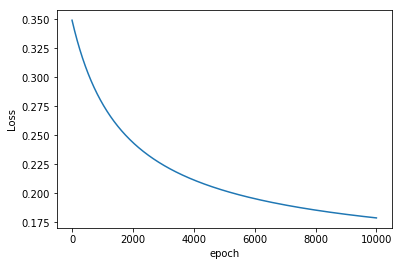

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
#plt.grid()